In [20]:
import pickle
import numpy as np
import pandas as pd

from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

complete_preprocessed = pd.read_pickle("preprocessed")
complete = pd.read_pickle("complete")
tsne = pickle.load(open("tSNE", "rb"))

In [3]:
complete.nativeCountry.value_counts()
complete_preprocessed.columns.values

array(['age', 'capitalGain', 'capitalLoss', 'hoursPerWeek',
       'countryProvided', 'country_typeI', 'nationals',
       'educationGeneral', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'salary_<=50K', 'salary_>50K', 'maritalStatus_Divorced',
       'maritalStatus_Married-AF-spouse',
       'maritalStatus_Married-spouse-absent',
       'maritalStatus_Never-married'

In [13]:
complete.nativeCountry.unique()

array(['United-States', nan, 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos',
       'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal', 'China',
       'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica', 'Ecuador',
       'Yugoslavia', 'Hungary', 'Hong', 'Greece', 'Trinadad&Tobago',
       'Outlying-US(Guam-USVI-etc)', 'France', 'Holand-Netherlands'], dtype=object)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


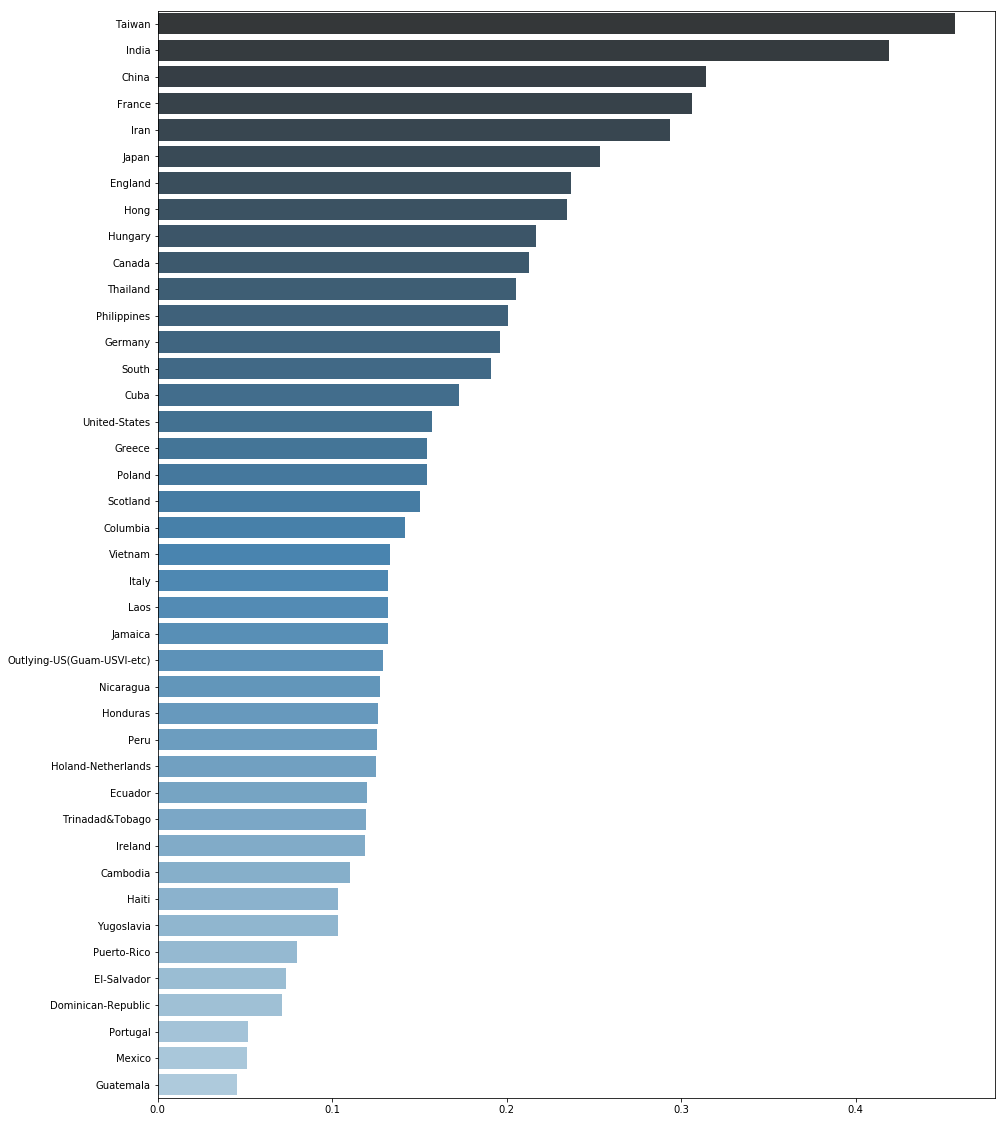

In [35]:
dictEducation = {} 


for Country in complete.nativeCountry.dropna().unique():
    dictEducation.update({Country: complete_preprocessed.loc[complete.nativeCountry == 
                                                   Country].educationGeneral.mean()})
dictEducation = dict(sorted(dictCountry.items(), key = lambda item: item[1], reverse=True))

plt.figure(figsize = (15, 20))
sns.barplot(y = list(dictEducation.keys()), x = list(dictEducation.values()), orient = "h",
           palette="Blues_d")
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


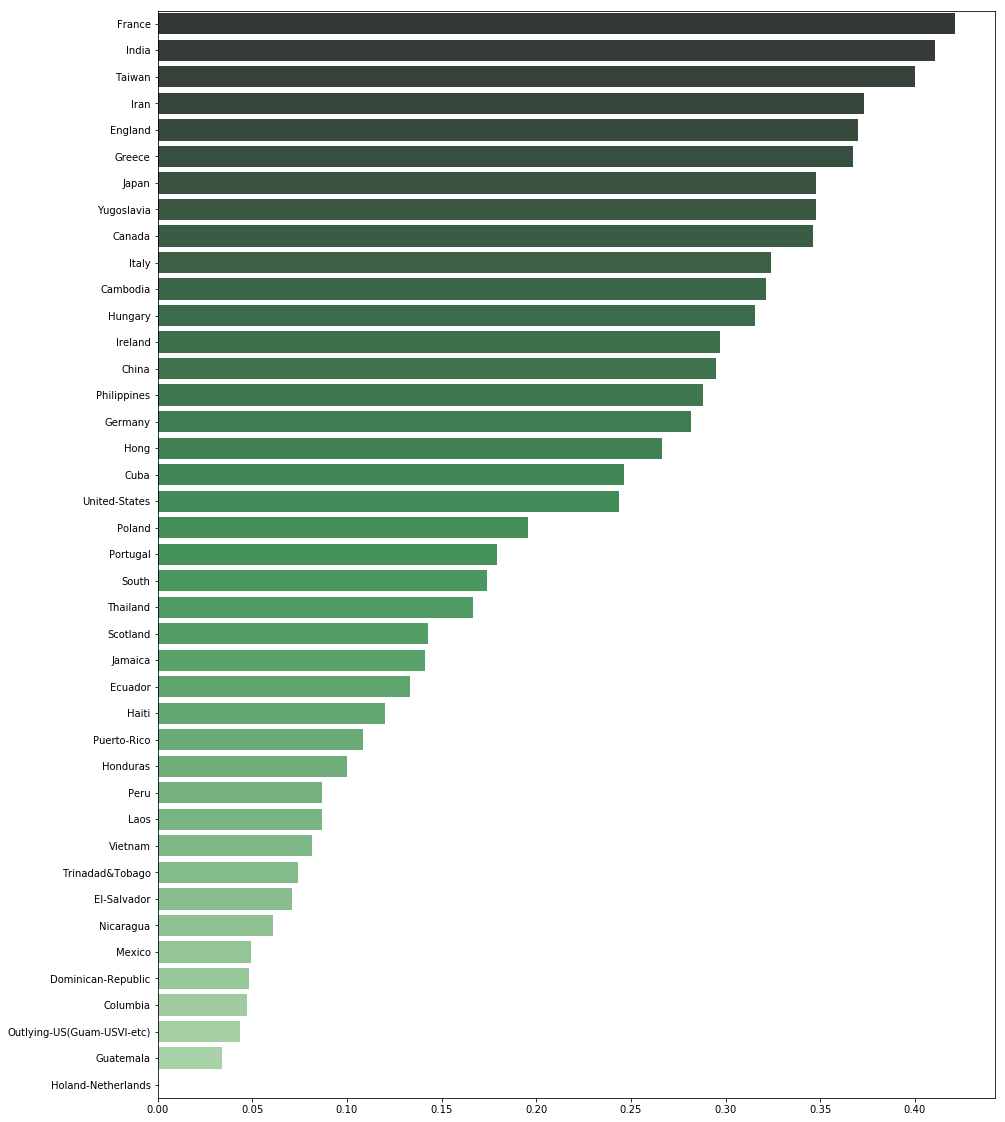

In [36]:
dictSalary = {} 

for Country in complete.nativeCountry.unique():
    dictSalary.update({Country: complete_preprocessed.loc[complete.nativeCountry == 
                                                   Country]['salary_>50K'].mean()})
    
dictSalary = dict(sorted(dictSalary.items(), key = lambda item: item[1], reverse=True))

plt.figure(figsize = (15, 20))
sns.barplot(y = list(dictSalary.keys()), x = list(dictSalary.values()), orient = "h",
           palette="Greens_d")
plt.show()

In [38]:
China = complete_preprocessed.loc[complete.nativeCountry == "China"]


logistic = linear_model.LogisticRegression()
# China.educationGeneral.reshape(-1, 1).shape
# #China["salary_>50K"].shape
logistic.fit(China.educationGeneral.reshape(-1, 1), China["salary_>50K"])
logistic.coef_[0][0]

/usr/bin/usr/bin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


1.059031629605254

In [39]:
~ (complete.nativeCountry == Country)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19        True
20       False
21       False
22       False
23        True
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
48812    False
48813    False
48814     True
48815    False
48816    False
48817    False
48818    False
48819    False
48820    False
48821    False
48822    False
48823    False
48824    False
48825    False
48826    False
48827    False
48828     True
48829    False
48830    False
48831    False
48832    False
48833    False
48834     True
48835    False
48836    False
48837    False
48838    False
48839    False
48840    False
48841    False
Name: nativeCountry, Length: 48842, dtype: bool

In [40]:
dictRentabilite = {}
dictAccuracy = {}

for Country in complete.nativeCountry.dropna().unique():
    
    country = complete_preprocessed.loc[complete.nativeCountry == Country]
    logistic = linear_model.LogisticRegression()
    logistic.fit(country.educationGeneral.reshape(-1, 1), country["salary_>50K"])
    
    countryOpposant = complete_preprocessed.loc[~ (complete.nativeCountry == Country)]
    logistic2 = linear_model.LogisticRegression()
    #logistic2.fit(countryOpposant.educationGeneral.reshape(-1, 1), country["salary_>50K"])
    
    if logistic.coef_[0][0] >= 0.7:
        
        dictAccuracy.update({Country: logistic.coef_[0][0]}) 
        dictRentabilite.update({Country: logistic.score(
            country.educationGeneral.reshape(-1, 1), country["salary_>50K"])})

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [47]:
for Country in ["China", "India", "France", "El-Salvador", "Philippines", "Cuba"]:
    print(Country)
    print(complete_preprocessed.loc[complete['nativeCountry'] == 
                                    Country].educationGeneral.value_counts(
    normalize=True, sort=False))




China
1.00000    0.131148
0.06250    0.229508
0.25000    0.237705
0.12500    0.073770
0.00000    0.081967
0.50000    0.196721
0.03125    0.049180
Name: educationGeneral, dtype: float64
India
0.50000    0.238411
0.12500    0.165563
0.25000    0.245033
1.00000    0.211921
0.06250    0.059603
0.03125    0.072848
0.00000    0.006623
Name: educationGeneral, dtype: float64
France
0.0000    0.026316
0.2500    0.263158
0.5000    0.184211
0.1250    0.263158
0.0625    0.157895
1.0000    0.105263
Name: educationGeneral, dtype: float64
El-Salvador
0.03125    0.193548
0.00000    0.354839
0.06250    0.219355
0.12500    0.148387
0.25000    0.051613
1.00000    0.012903
0.50000    0.019355
Name: educationGeneral, dtype: float64
Philippines
0.25000    0.355932
0.06250    0.179661
0.12500    0.264407
0.00000    0.067797
1.00000    0.047458
0.03125    0.047458
0.50000    0.037288
Name: educationGeneral, dtype: float64
Cuba
0.03125    0.123188
0.12500    0.231884
0.06250    0.239130
1.00000    0.057971
0.0

In [53]:
complete.age.corr(complete.hoursPerWeek)


for Occupation in complete.occupation.dropna().unique():
    occupation = complete_preprocessed.loc[complete.occupation == Occupation]
    print(Occupation, ", ", occupation.age.corr(occupation.hoursPerWeek))

Machine-op-inspct ,  -0.0157373327386
Farming-fishing ,  -0.0235576707828
Protective-serv ,  -0.0775911371198
Other-service ,  0.154810805888
Prof-specialty ,  0.0535596198031
Craft-repair ,  -0.0338894508548
Adm-clerical ,  0.0986347184908
Exec-managerial ,  -0.0469318322903
Tech-support ,  0.0504212135409
Sales ,  0.208525536632
Priv-house-serv ,  -0.0246145807421
Transport-moving ,  -0.0295141205295
Handlers-cleaners ,  0.1380785508
Armed-Forces ,  0.325108486469


In [52]:
for Occupation in complete.occupation.dropna().unique():
    for Workclass in complete.workclass.dropna().unique():
        occupation = complete.loc[(complete.occupation == Occupation) & (
            complete.workclass == Workclass)]
        print(Occupation, ", ", Workclass, ", ", occupation.age.corr(occupation.hoursPerWeek))

Machine-op-inspct ,  Private ,  -0.00186110143533
Machine-op-inspct ,  Local-gov ,  -0.443979703321
Machine-op-inspct ,  Self-emp-not-inc ,  -0.347891829126
Machine-op-inspct ,  Federal-gov ,  0.283457961647
Machine-op-inspct ,  State-gov ,  -0.267033031934
Machine-op-inspct ,  Self-emp-inc ,  0.148122098623
Machine-op-inspct ,  Without-pay ,  1.0
Machine-op-inspct ,  Never-worked ,  nan
Farming-fishing ,  Private ,  0.0493559481621
Farming-fishing ,  Local-gov ,  -0.253449779172
Farming-fishing ,  Self-emp-not-inc ,  -0.252992406619
Farming-fishing ,  Federal-gov ,  nan
Farming-fishing ,  State-gov ,  0.0348471350497
Farming-fishing ,  Self-emp-inc ,  0.112077702518
Farming-fishing ,  Without-pay ,  0.112863305524
Farming-fishing ,  Never-worked ,  nan
Protective-serv ,  Private ,  -0.0689730717062
Protective-serv ,  Local-gov ,  -0.117356491496
Protective-serv ,  Self-emp-not-inc ,  -0.0833782591914
Protective-serv ,  Federal-gov ,  -0.0647918405499
Protective-serv ,  State-gov ,  0.

/usr/bin/usr/bin/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/bin/usr/bin/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


 0.0103369292568
Craft-repair ,  Without-pay ,  nan
Craft-repair ,  Never-worked ,  nan
Adm-clerical ,  Private ,  0.0975426167455
Adm-clerical ,  Local-gov ,  -0.0256600346255
Adm-clerical ,  Self-emp-not-inc ,  0.0408851687074
Adm-clerical ,  Federal-gov ,  0.0385273302397
Adm-clerical ,  State-gov ,  0.370353489433
Adm-clerical ,  Self-emp-inc ,  -0.165380444705
Adm-clerical ,  Without-pay ,  -0.99277775756
Adm-clerical ,  Never-worked ,  nan
Exec-managerial ,  Private ,  0.0294119301514
Exec-managerial ,  Local-gov ,  -0.154997238935
Exec-managerial ,  Self-emp-not-inc ,  -0.266431976841
Exec-managerial ,  Federal-gov ,  -0.0604686438705
Exec-managerial ,  State-gov ,  0.0704581417944
Exec-managerial ,  Self-emp-inc ,  -0.207216753641
Exec-managerial ,  Without-pay ,  nan
Exec-managerial ,  Never-worked ,  nan
Tech-support ,  Private ,  0.0501118194028
Tech-support ,  Local-gov ,  -0.196655345287
Tech-support ,  Self-emp-not-inc ,  -0.162545800877
Tech-support ,  Federal-gov ,  0.0